# <span style="color:Maroon">Crab Age Prediction EDA

## <span style="color:Maroon">Problem Statement: 
###### The file data.csv contains the observation of a study on crabs found around the Boston Area.

###### The challenge consist of making some sense out of those data. We're notably looking for a method to predict the age of a crab given its features.

### <span style="color:Maroon">Part 2: EDA: Exploratory Data Analysis (Part 2)

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [2]:
os.getcwd()

'C:\\Users\\sidhu\\Downloads\\CrabAgePrediction\\Codes'

In [3]:
# Read the csv file data
os.chdir('..\\Data\\')
df = pd.read_csv('data_treated.csv')
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


In [4]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
count,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000
mean,1.309256,1.019176,0.347746,23.399535,10.129307,5.106812,6.742628,9.915635,0.314499,0.318111,0.367389
std,0.299227,0.247200,0.095381,13.658174,6.148418,3.066542,3.848888,3.122588,0.464376,0.465803,0.482156
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,0.000000
25%,1.125000,0.875000,0.287500,12.647421,5.326162,2.650678,3.699610,8.000000,0.000000,0.000000,0.000000
50%,1.362500,1.062500,0.350000,22.743386,9.518345,4.847764,6.662132,10.000000,0.000000,0.000000,0.000000
75%,1.537500,1.200000,0.412500,32.644449,14.188925,7.172423,9.273830,11.000000,1.000000,1.000000,1.000000
max,2.000000,1.575000,0.625000,72.432972,34.926584,16.726205,20.581737,20.000000,1.000000,1.000000,1.000000


### <span style="color:Maroon">2.1: Box Plots for All Variables

In [5]:
# Change directory to Images
os.chdir("..\\Images")

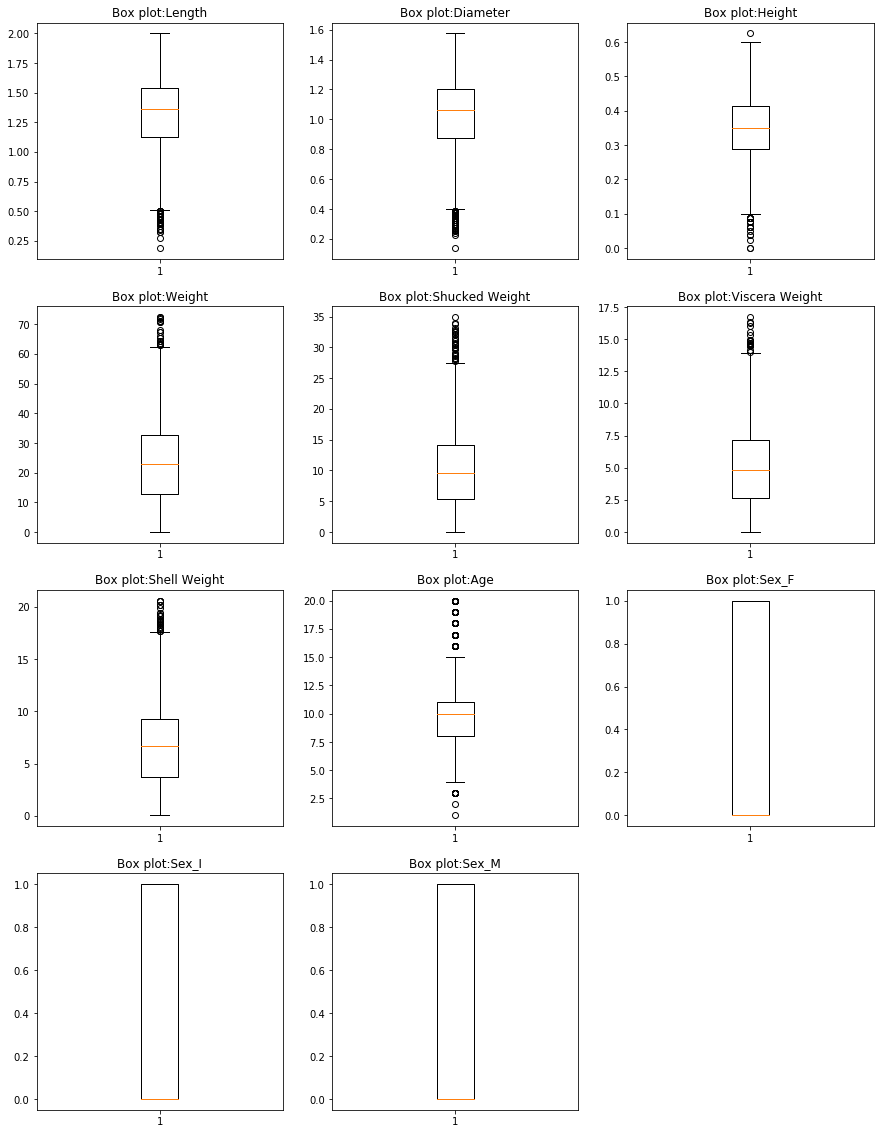

In [6]:
# Draw Box plots for the treated dataset to visulize if there are any outliers left
variables = list(df.columns)

no_rows = int(np.ceil(len(variables)/3))

plt.rcParams['figure.figsize'] = [15, 5*no_rows]


for i in range(0,len(variables)):
    plt.subplot(no_rows,3,(i+1))
    plt.boxplot(df[variables[i]])
    plt.title("Box plot:" + str(variables[i]))
plt.savefig("BoxPlots_All.png")
plt.show()

### <span style="color:Maroon">2.2: Scatter Plot for all the Variables

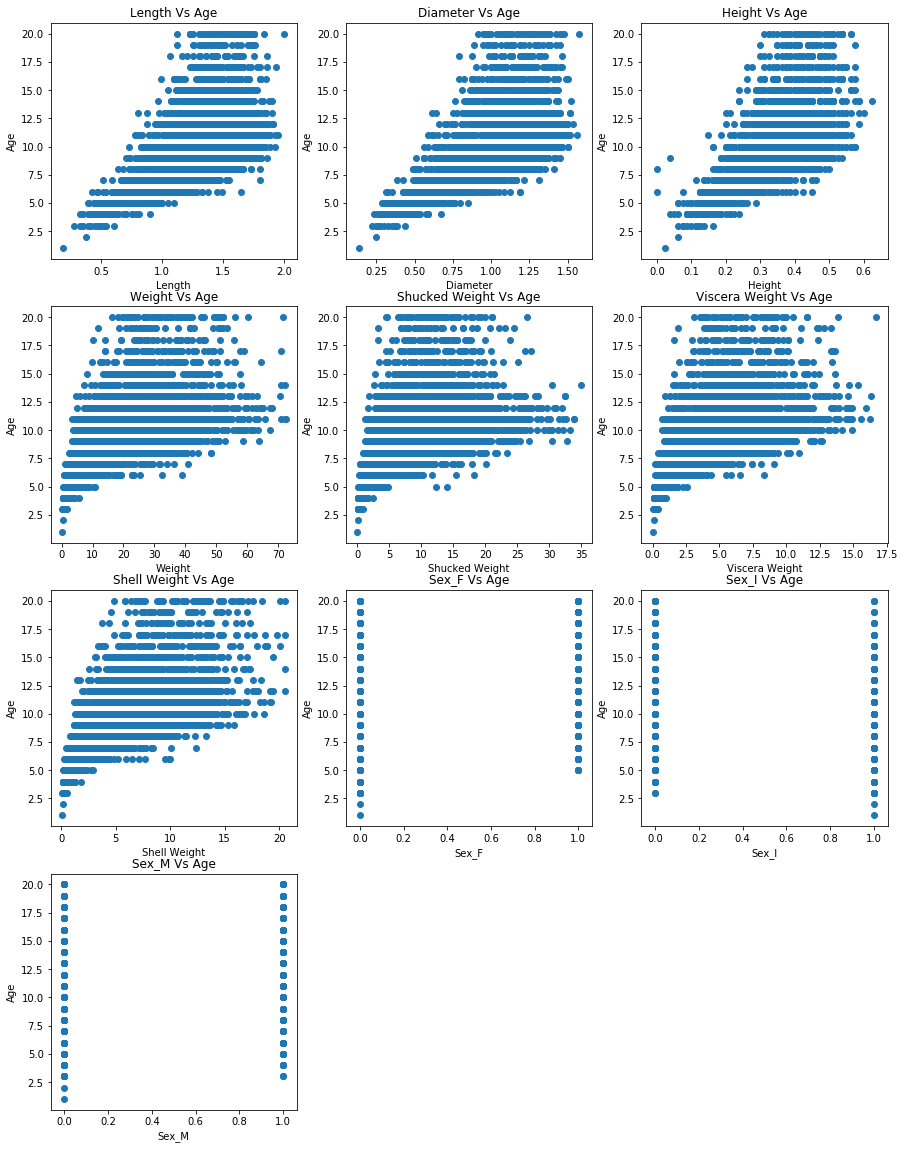

In [7]:
# Draw scatter plot for the treated dataset
variables = list(df.columns)
variables.remove("Age")

no_rows = int(np.ceil(len(variables)/3))

plt.rcParams['figure.figsize'] = [15, 5*no_rows]


for i in range(0,len(variables)):
    plt.subplot(no_rows,3,(i+1))
    plt.scatter(df[variables[i]], df["Age"])
    plt.xlabel(variables[i])
    plt.ylabel("Age")
    plt.title(str(variables[i]) + " Vs Age")
plt.savefig("ScatterPlotsAll.png")
plt.show()

###### Comments:
Based on the plots, all variables are within the limits (With no extreme observation). Other than gender variables (Sex_I, Sex_F, Sex_M), all variables have positive linear relationship (based on scatter plots)

### <span style="color:Maroon"> 2.3: One on One Trend relationship with Age and Gender

In [8]:
def plot_gender_diff(df, var1):
    # subset the data
    f_df = df[df["Sex_F"]==1][[var1, "Age"]]
    m_df = df[df["Sex_M"]==1][[var1, "Age"]]
    i_df = df[df["Sex_I"]==1][[var1, "Age"]]
    
    # Group by Age
    f_df = f_df.groupby("Age").mean()
    m_df = m_df.groupby("Age").mean()
    i_df = i_df.groupby("Age").mean()
    
    plt.rcParams['figure.figsize'] = [8, 5]
    # Plot the figures
    plt.plot(i_df.index, i_df[var1], 'b-', label="Gender: I")
    plt.plot(f_df.index, f_df[var1], 'r*', label="Gender: F")
    plt.plot(m_df.index, m_df[var1], 'yo', label="Gender: M")
    plt.xlabel("Age")
    plt.ylabel(str(var1))
    plt.title("Average {} observed for different genders by age".format(var1))
    plt.legend()
    plt.savefig(f'Age_Gender_{var1}.png')
    plt.show()
    return

#### <span style="color:Maroon"> 2.3.1: Length

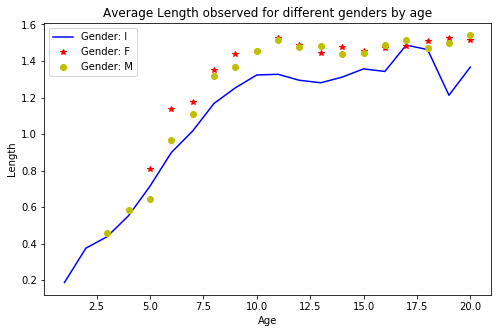

In [9]:
plot_gender_diff(df, "Length")

<span style="color:Blue">__Comments:__ The average length of a Male and Female crab is very similar to one another. The crabs with "Intermediate" gender have a lower length compared to M & F gender

#### <span style="color:Maroon"> 2.3.1: Diameter

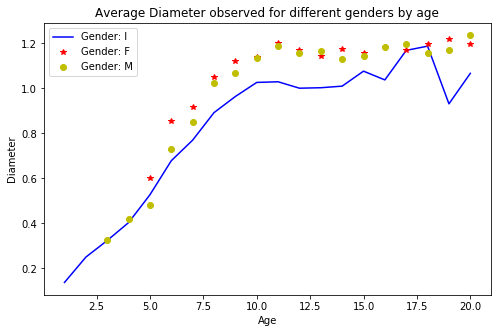

In [10]:
plot_gender_diff(df, "Diameter")

<span style="color:Blue">__Comments:__ The average diameter of a Male and Female crab is very similar to one another. The crabs with "Intermediate" gender have a lower diameter compared to M & F gender

#### <span style="color:Maroon"> 2.3.1: Height

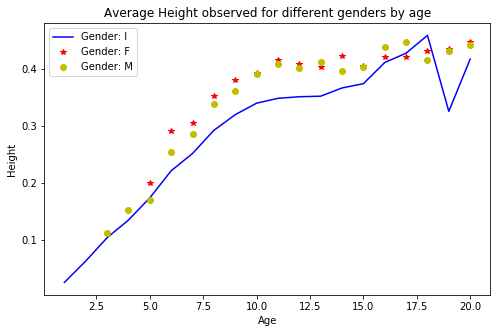

In [11]:
plot_gender_diff(df, "Height")

<span style="color:Blue">__Comments:__ The average height of a Male and Female crab is very similar to one another. The crabs with "Intermediate" gender have a lower height compared to M & F gender

#### <span style="color:Maroon"> 2.3.1: Weight

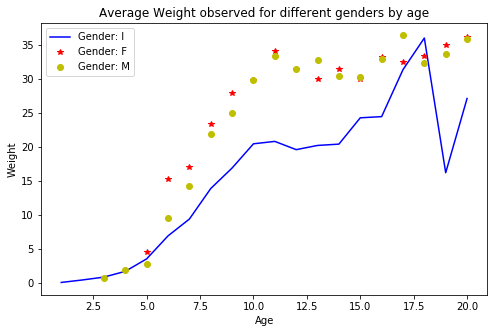

In [12]:
plot_gender_diff(df, "Weight")

<span style="color:Blue">__Comments:__ The average weight of a Male and Female crab is very similar to one another. The crabs with "Intermediate" gender have a lower weight compared to M & F gender

#### <span style="color:Maroon"> 2.3.1: Shell Weight

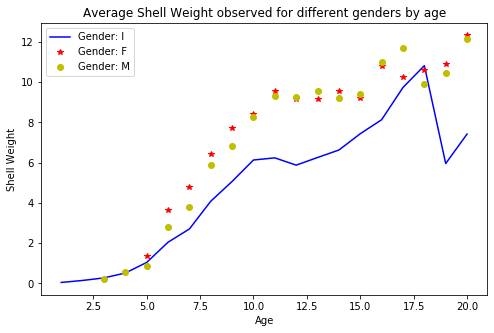

In [13]:
plot_gender_diff(df, "Shell Weight")

<span style="color:Blue">__Comments:__ The average Shell Weight of a Male and Female crab is very similar to one another. The crabs with "Intermediate" gender have a lower Shell Weight compared to M & F gender